# 1. Introduction

**About the Dataset**

Customer churn, also called customer attrition,is the measure of how many customers stop using a product. This can be measured based on actual usage or failure to renew (when the product is sold using a subscription model). Often evaluated for a specific period of time, there can be a monthly, quarterly, or annual churn rate.

**Context**

"Churn is a one of the biggest problem in the telecom industry. This project aims to Predict behavior to retain customers. The goal is to analyze all relevant customer data and develop focused customer retention programs." 

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents



# 2.Loading libraries and data

In [1]:
import numpy as np # matrix
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt # for creating plots
import seaborn as sns # visulizing data
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno #package for visualization of missing data

import warnings # ignoring the warning
warnings.filterwarnings('ignore')

In [2]:
telcco_df = pd.read_csv('Churn_data.csv')

# 3. Understanding the data 
###  Descriptive Analysis


## 3.1. looking at the data

#### 1. Data table

In [ ]:
telcco_df.head(10) # did 10 rows to have a bit more to look at.

#### 2. Information about the dataset

In [ ]:
telcco_df.shape

In [ ]:
telcco_df.info()

In [ ]:
telcco_df.dtypes

**Observasion: The totalCharges column has the wrong data type, its numeric but regestered as an object. SeniorCitizen is also in a wrong format, its in dtype integer which could be seen as correct but its just a binary number 1 and 0 which indicates that it is a yes and no type answer.**

In [ ]:
# looking at the columns
telcco_df.columns

In [ ]:
telcco_df.describe()

**We can see that there are 7043 rows and 21 columns in the dataset. Also, there are 19 object type, 2 int type and 1 float type columns in the dataset. Total charges column is of object type, we need to convert it to float type.**in the describe we can observe that the senior citizen column is out of place. it is a binary value, meaning that it is either a yes or a no and there for could be in type object instead.

## 3.2 Data Manipulation
#### Univariate Descriptive Analysis

### Cleaning data

In [3]:
# Converting Total Charges to a numerical data type.
telcco_df.TotalCharges = pd.to_numeric(telcco_df.TotalCharges, errors='coerce') #errors='coerce' stands for invalid parsing will be set as NaN

In [4]:
# checking so that the TotalCharges column has changed format and what other columns correspond in dtype
for col in telcco_df.select_dtypes(float): 
    print(col)

MonthlyCharges
TotalCharges


**We could also see that the seniorcitizen column has a binary value, its in integers (0,1) insted of it beeing a yes or no. Changing the data type will take away the value 0. We will also drop customer id column as it is of no use to us.**

In [5]:
telcco_df["SeniorCitizen"].replace(to_replace=[0, 1], value=["No", "Yes"], inplace=True)


In [6]:
telcco_df = telcco_df.drop(columns="customerID", axis = 1) # not needed in computation
telcco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking for duplicates in the set
There are three main types of data duplication:

- **Exact duplicates** are rows that contain the same values in all columns.
- **Partial duplicates** are rows that contain the same values in some columns.
- **Duplicate keys** are rows that contain the same values in one or more columns, but not all columns.

In [7]:
duplicates = telcco_df.duplicated(keep=False) #By setting keep on False, all duplicates are True.
print(f"Number of duplicated rows: {duplicates.sum()}")

Number of duplicated rows: 42


In [8]:
Ddf = telcco_df.copy() #looking at an inspecting the duplicates by making a seperate dataframe
Ddf['Duplicates'] = duplicates

In [9]:
true_Ddf = Ddf[Ddf.Duplicates == True] # looking at all the duplicates
true_Ddf.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Duplicates
22,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,True
100,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No,True
542,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No,True
646,Male,No,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes,True
662,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No,True
690,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No,True
964,Male,No,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes,True
976,Male,No,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes,True
1243,Male,No,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes,True
1338,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,True


The Duplicates look like partal duplicates

In [10]:
true_Ddf['gender'].value_counts() # there are less females, it will help to look at fewer ex.

Male      26
Female    16
Name: gender, dtype: int64

In [11]:
Ddf[(Ddf.Duplicates == True) & (Ddf.gender == 'Female')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Duplicates
542,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No,True
1491,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No,True
1731,Female,Yes,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes,True
3301,Female,Yes,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes,True
3499,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.90,Yes,True
4476,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.90,Yes,True
4495,Female,No,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.10,Yes,True
4817,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.90,No,True
5170,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No,True
5522,Female,No,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes,True


**by looking at the females only we can see a cuple of exact duplicates. but this is a list of customers which means that thay can choose the same sevices. it also apears that all the customers are new and have been a customer for 1 month. this could mean that all are limited to similar services/packeges and payments which make it easer to get similar rows of data. but becouse there are only 42 similar rows i will decide to discard some by only keeping the first duplicates. it will not effect the training data much.**

In [12]:
"""By default, duplicated() considers the entire row to be a duplicate if all the values in the row are the same. 
It also considers the first row to be unique, so the first row will always be False, 
since it doesn’t become a duplicate until the next occurrence is encountered."""

duplicates = telcco_df.duplicated() 
print(f"Number of duplicated rows: {duplicates.sum()}")

Number of duplicated rows: 22


In [13]:
# looks like almoset half disapered so it feels safe to remove them
del Ddf
del true_Ddf
telcco_df.drop_duplicates(inplace=True)

### Missing values 

#### **Analysis and Treatment of Missing Data**
The analysis and treatment of missing data follows two essential steps:

- identifying the nature and type of missing data.  

Once the type of data has been identified, processing is done. This consists of either: 
- Delete the missing values (if they are less than 10% of the data in the database)
- to make an input by the average, the median, the mode,
- Imputation by $k$ nearest neighbors,
- Imputation by an iterative method based on regression analysis, 
    

The treatment of missing data depends on the :
- Missing data device: structured or unstructured
- Mechanism leading to the appearance of missing data:

    - MAR' (Missing At Random). This would mean that the missing values depend on other observed data but not on the missing data itself. It can also mean that the probability that an observation is incomplete depends only on observed values (not on missing values). For example, in the case of our dataset, the variable total fees may be missing because the variable monthly fees is missing or the variable 'tenure' i.e. the number of time the customer has stayed with the company is zero (new customer). This would mean that there could be a potential link between total fees and monthly fees or between total fees and the entry of a new customer. 
        - Recommended methods for dealing with these types of missing data: Imputation techniques such as `KNN`, `MissForest` or `regression` are used


    - Missing Completely At Random (MCAAR). This would mean that the missing data have no relation with the other data. It can also mean that the probability of an information being incomplete is constant. For example, in the case of our database, the probability that the client's age is `NA' does not depend on the sex of the client or any other variable. 
        - recommended methods for dealing with missing data : In general, in practice, it is very rare that the data are `MCAR'. On the other hand, if there is evidence that the data are `MCAR' one can decide to delete the observations if the proportions are small (less than $5%$) or to impute by the mean, the median if the variable is numerical and by the mode if it is categorical. 
        
    
    - NMAR` (Not Missing At Random). Here, the missing data depend on the values themselves. This can be translated by the fact that the probability that an observation is incomplete depends on the unobserved values in a random way. For example, in the case of this dataset, the variable total fees may be missing simply because some clients have decided not to report their total fees. This may be due to the high amount of the fee. 
        - recommended methods for dealing with this missing data: As with the missing MAR data, the imputation methods such as KNN, MissForest and the regression-based iteration method are also used to process these data.


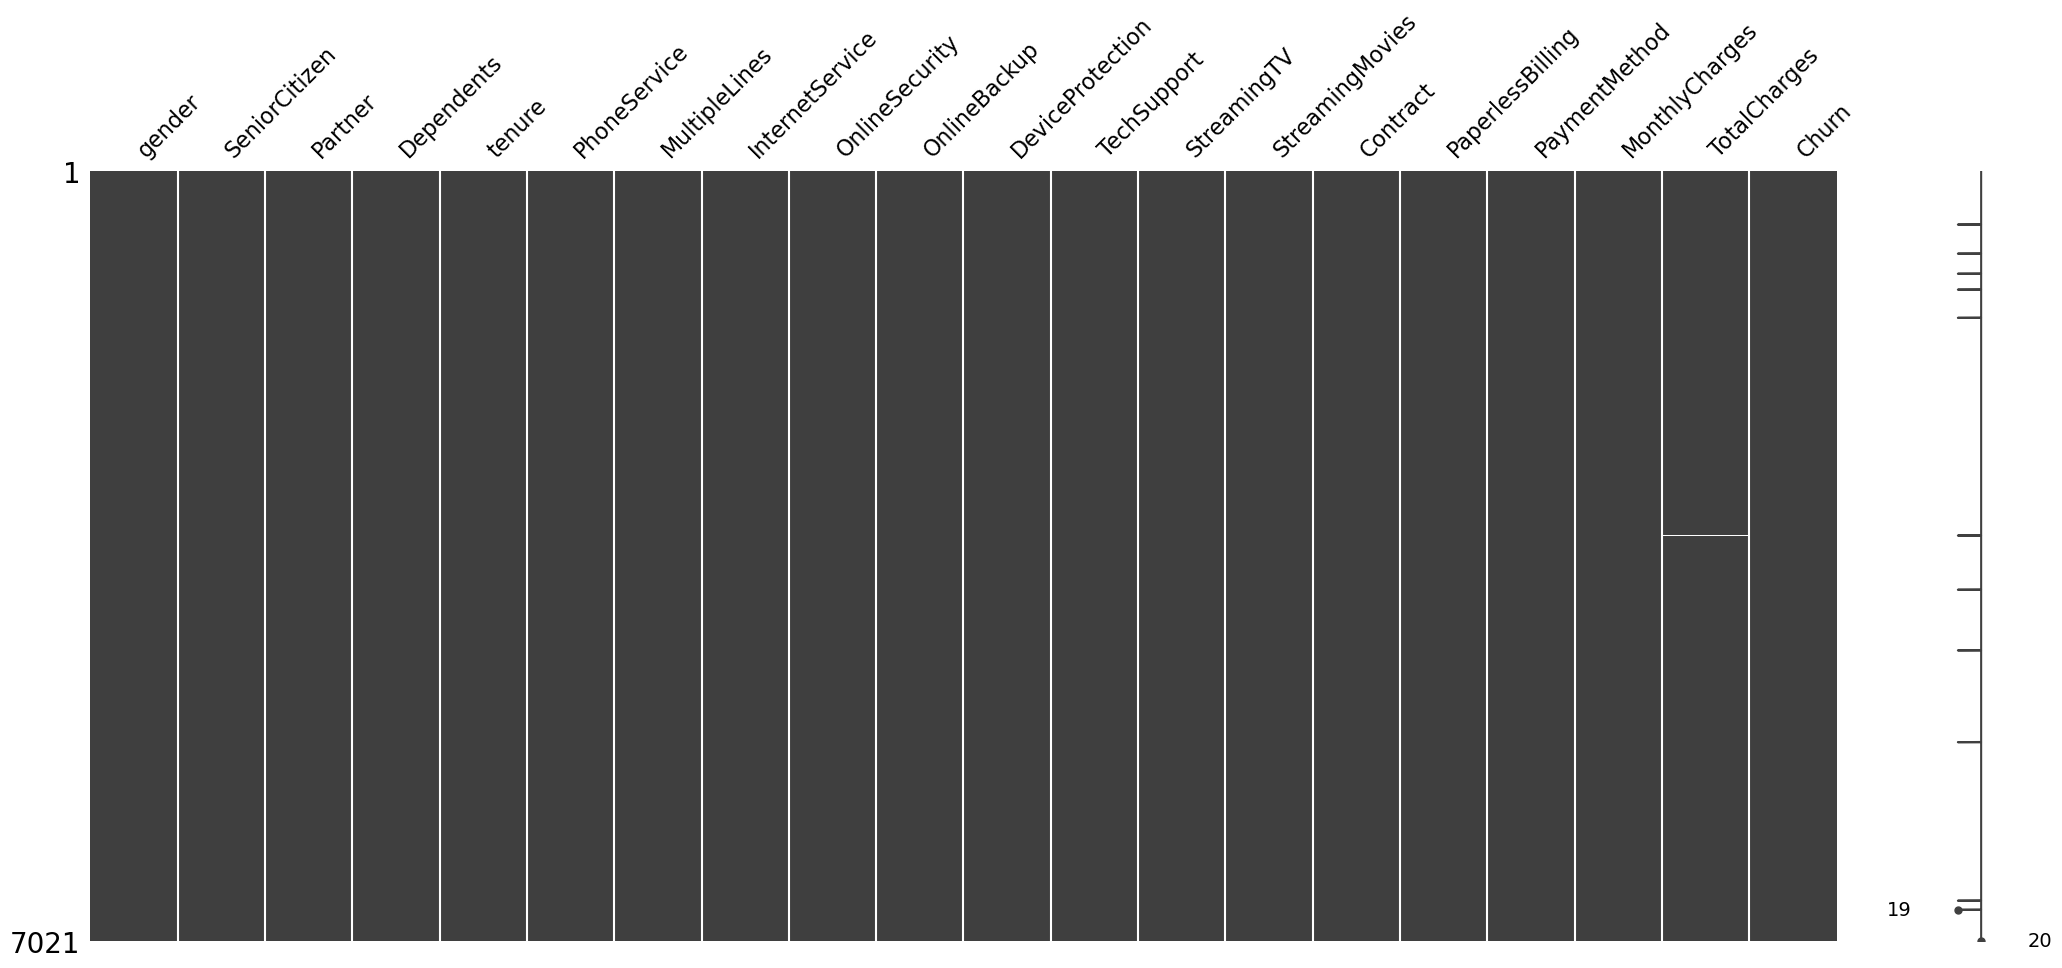

In [15]:
#using this matrix we can very quickly find the pattern of missing values in the dataset.
msno.matrix(telcco_df); 

In [16]:
telcco_df.isnull().sum() # or we can look at it like this and get actual numbers.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telcco_df[np.isnan(telcco_df['TotalCharges'])] # here we can see all the accounts that has undefined values in total-charges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
telcco_df[telcco_df['tenure'] == 0].index # checking where in the data tenure is = 0

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

 We can see that there are 11 missing values in total charges column.It looks like the non existing values in totalcharges are related to 0 months of tenure. We could eather change the NaN value or drop these rows as it is a very small percentage of the total data. 

In [20]:
telcco_df.loc[np.isnan(telcco_df['TotalCharges']),('tenure','TotalCharges','Churn')] # we can now see that there is a correlation between the two || locating two columns from the dataframe

,tenure,TotalCharges,Churn
488,0,NaN,No
753,0,NaN,No
936,0,NaN,No
1082,0,NaN,No
1340,0,NaN,No
3331,0,NaN,No
3826,0,NaN,No
4380,0,NaN,No
5218,0,NaN,No
6670,0,NaN,No


We can also see that none of the customers with missing values have churned, which also means that they are new customers.

### Statistical description
##### looking at the procentage of which the missing values occuer
Descriptive statistics allow us to know the distribution of the different variables in a given set. They give information about the central tendency characteristics such as the mean, mode, median, maximum and minimum of a numerical variable. In the case of categorical variables, we have the mode, and the relative frequencies.

In [14]:
# Table of missing values by column
missing_values = telcco_df.isnull().sum()
missing_percent = (missing_values / telcco_df.shape[0]) 
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                  Missing Values  Percentage
gender                         0    0.000000
SeniorCitizen                  0    0.000000
Partner                        0    0.000000
Dependents                     0    0.000000
tenure                         0    0.000000
PhoneService                   0    0.000000
MultipleLines                  0    0.000000
InternetService                0    0.000000
OnlineSecurity                 0    0.000000
OnlineBackup                   0    0.000000
DeviceProtection               0    0.000000
TechSupport                    0    0.000000
StreamingTV                    0    0.000000
StreamingMovies                0    0.000000
Contract                       0    0.000000
PaperlessBilling               0    0.000000
PaymentMethod                  0    0.000000
MonthlyCharges                 0    0.000000
TotalCharges                  11    0.001567
Churn                          0    0.000000


We notice that the variable on total expenses contains  0.015% of missing values this nummber is so small that i dought this will make any significant change in the weight of the feature. but lets just test out an other method to see the outcome.

## KNN imputer
### MAR' (Missing At Random).
In the case of this dataset, the missing data for the variable total charges is MAR because the missing data for this variable depends mainly on the variable tenure which would mean that we have not yet accounted for the total charges of the new clients. Therefore, we will use the KNN and see if it makes any significant change.

**The `KNNImputer` algorithm** of `scikit-learn` is a missing value imputation method based on $k$ nearest neighbors. It is a non-parametric approach that uses the values of the $k$ nearest neighbors to impute missing values.

The algorithm works in several steps:

1. Define the value of $k$, which represents the number of nearest neighbors to consider for imputation.

2. For each missing value, find the $k$ nearest neighbors among the other observations that have non-missing values for the variable in question. The distance between observations can be measured in different ways, such as the Euclidean distance or the Manhattan distance.

3. Imput the missing value by the mean or median value of the $k$ nearest neighbors.

Implementation:

In [25]:
from sklearn.impute import KNNImputer 
#KNNImputer with a number of neighbors equal to 3
telcco_df[["TotalCharges_KNNImputer"]] = KNNImputer(n_neighbors=3).fit_transform(telcco_df[["TotalCharges"]])
telcco_df.isnull().mean()

gender                     0.000000
SeniorCitizen              0.000000
Partner                    0.000000
Dependents                 0.000000
tenure                     0.000000
PhoneService               0.000000
MultipleLines              0.000000
InternetService            0.000000
OnlineSecurity             0.000000
OnlineBackup               0.000000
DeviceProtection           0.000000
TechSupport                0.000000
StreamingTV                0.000000
StreamingMovies            0.000000
Contract                   0.000000
PaperlessBilling           0.000000
PaymentMethod              0.000000
MonthlyCharges             0.000000
TotalCharges               0.001567
Churn                      0.000000
TotalCharges_KNNImputer    0.000000
dtype: float64

Note here that the new variable TotalCharges_KNNImputer has been created and does not contain any missing data. so that the original column does not get tampered with.

### Describe
**Display the descriptive statistics of the different variables**.
descriptive statistics on numerical variables:
| Measure | Definition | Advantages | Disadvantages |
|-------------------|-------------------|-------------------|-------------------|
|mean|It is the sum of the products of each value and its weight in a distribution divided by the sum of the weights of the distribution. It is used when some values are more important than others in a data set. |It is easy to compute and widely used in statistics and machine learning.|sensible to outliers
|median |It is the value that separates a data set from a distribution into two equal parts|It is not sensitive to outliers and is used for asymmetric data| It may not be representative for bimodal and multimodal distributions|
| mode|This is the most frequently observed value in a data distribution| It is very useful for discrete and categorical data | It may not exist, or it may have several modes for a data set |

In [26]:
telcco_df.describe()

,tenure,MonthlyCharges,TotalCharges,TotalCharges_KNNImputer
count,7021.000000,7021.000000,7010.000000,7021.000000
mean,32.469449,64.851894,2290.353388,2290.353388
std,24.534965,30.069001,2266.820832,2265.044136
min,0.000000,18.250000,18.800000,18.800000
25%,9.000000,35.750000,408.312500,411.150000
50%,29.000000,70.400000,1403.875000,1410.250000
75%,55.000000,89.900000,3807.837500,3801.700000
max,72.000000,118.750000,8684.800000,8684.800000


We can see here that the descriptive statistics on the variable TotalCharges before and after imputation differ mainly at the median. This would mean that the results of the imputation did not bring a big change in the distribution of this variable.

In [30]:
#Descriptive statistics on categorical variables
telcco_df.describe(include='O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3541,5880,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,5164


with this we can conclude that its better to just drop the missingvalues than to impute them

In [ ]:
telcco_df = telcco_df.drop(['customerID'], axis = 1)

In [28]:
telcco_df.shape

(7021, 21)

In [29]:
print('Number of unique values:\n',telcco_df.nunique())

Number of unique values:
 gender                        2
SeniorCitizen                 2
Partner                       2
Dependents                    2
tenure                       73
PhoneService                  2
MultipleLines                 3
InternetService               3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtection              3
TechSupport                   3
StreamingTV                   3
StreamingMovies               3
Contract                      3
PaperlessBilling              2
PaymentMethod                 4
MonthlyCharges             1585
TotalCharges               6530
Churn                         2
TotalCharges_KNNImputer    6531
dtype: int64


# 4.Visulizing Data

## Data Exploration
Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

A.) Demographics - Let us first understand the gender, age range, patner and dependent status of the customers

### Pie plot

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=telcco_df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=telcco_df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

26.6 % of customers switched to another firm.
Customers are 49.5 % female and 50.5 % male.

In [ ]:
fig = px.histogram(telcco_df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [ ]:
fig = px.histogram(telcco_df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
 telcco_df[telcco_df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

In [ ]:
telcco_df[telcco_df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(telcco_df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(telcco_df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#Remove customer IDs from the data set
df2 = telcco_df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)


#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

In [ ]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

onth to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(telcco_df.MonthlyCharges[(telcco_df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(telcco_df.MonthlyCharges[(telcco_df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

df_numeric = telcco_df[["tenure", "MonthlyCharges", "TotalCharges"]]
for i , col in enumerate(df_numeric):
    sns.boxplot(y = col, data = df_numeric, ax = ax[i])
    ax[i].set_title(f"Boxplot {col}")
    
plt.tight_layout();

We can notice here that there are no outliers in our distributions. However, the distributions displayed by the variables Tenure and MontlyCharges and TotalCharges show that these are not symmetrical. To have a confirmation on these graphical results, we will study the normality of these variables through more in-depth analyses.

In [ ]:
#boxplot for each category modality versus the Churn variable
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

for i, col in enumerate(df_numeric[["tenure", "MonthlyCharges", "TotalCharges"]]):
    sns.boxplot(x = "Churn", y = col, data = telcco_df, ax = ax[i])
    
plt.tight_layout();

**By studing the relationship between the tenure and Churn variables we can see**.

In the first graph, we notice a very big difference between the subscription duration of customers who remained loyal to the company and the subscription duration of customers who unsubscribed from the company. Additionally, the median churn duration of customers who remained loyal to the company is significantly greater than the maximum of the 2nd wiskersplots median band. From this difference, we can say that on average, the subscription duration of customers who have unsubscribed is graphically lower than the subscription duration of customers who have remained loyal to the company. 

**By studing the relationship between the MonthlyCharges and Churn variables we can see.**

On the 2nd graph, in relation to these two variables, we have two different groups. The first group represents the monthly amount billed to the customer who remained loyal to the company and the second group, the monthly amount billed to the customer who unsubscribed from the company. Of these two groups, we see that the differences within these groups are mainly located at the level of the median and the first quartile. In the Q1 group, the median is closer to 1𝑒𝑟
  quartile of 1𝑒𝑟
  group than the median of this group. 

Study of the relationship between TotalCharges and churn

On the third graph, we also have two different groups. The first group represents the total amount billed to customers who remained loyal to the company and the second group, the total amount of charges billed to customers who unsubscribed from the company. From these two groups, we observe differences at every point in the two Boxplots. 


## Bivariate Descriptive Analysis

In this part, it will be about:

perform correlation analyzes between quantitative variables
Perform correlation tests between quantitative variables

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, telcco_df)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
for i, col in enumerate(df_numeric):
    sns.distplot(df_numeric[col], ax = ax[i], color = 'r')
    ax[i].set_title(f"Distribution of {col}");

## Analysis of the link between two quantitative variables

In [ ]:
sns.pairplot(telcco_df[["tenure", "MonthlyCharges", "TotalCharges"]]);

In [ ]:
# the correlation table and heatmap
corr_matrix = df_numeric[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
#Calculation of p-values for each pair of variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu");

With this correlation matrix, we can observe a strong correlation between the total charges and tenure, i.e. the number of months that the client stayed with the company. We can therefore say that there is a positive linear link between the total charge and the duration of the customer with the company. On the other hand, we observe a weak correlation between monthly fees and the duration of the customer in the company and a positive correlation between monthly fees and the total charges borne by the customer. To support these elements certain correlation tests are necessary. Now, it is necessary to see if the observed correlations are significant, that is to say if they are true with a certain level of reliability.

(null hypothesis): There is no **linear** correlation between the two variables
(alternative hypothesis): There is a **linear** correlation between the two variables.
Terms of use :
- Both variables are quantitative and measured on a continuous scale.
- The relationship between the two variables is linear
- Both variables follow a **normal distribution**.

Interpretation:
The Pearson correlation coefficient varies between -1 and 1.
- If the coefficient is close to 1 for example (0.6), there is a positive correlation between the variables.
- If the coefficient is close to -1 (for example -0.6), there is a negative correlation between the variables.
- If the coefficient is close to 0, there is no linear correlation between the variables.

You can also look at the $p-value$ of the test which represents the threshold of significance below which the hypothesis $H_{0}$ is not valid:

- If $p < 0.05$, we reject H0 and we conclude that there is a significant correlation between the two variables.
- If $p \geq 0.05$, we cannot reject H0 and we conclude that there is not enough evidence to say that there is a significant correlation between the two variables.

# 5.Data Manipulation FEATURE ENGENERING

In [ ]:
y = telcco_df["Churn"]
X = telcco_df.drop(["Churn"], axis = 1).copy()

from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'{X_train.shape} et {y_train.shape}')
print("\n")
print(f"{X_test.shape} et {y_test.shape}")

### 1.1 Oversampling, Undersampling, ADASYN and Smote

#### Oversampling or Undersampling

**Oversampling** is a resampling technique used to handle unbalanced datasets by increasing the number of samples from the minority class. This can be done by duplicating existing samples or generating new synthetic samples from existing data, for example using methods such as SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling).

### Avantages

- Improves model performance on the minority class by increasing the amount of information available for learning.
- Reduces bias towards the majority class, which can improve overall model accuracy.
- Makes it easier to discover meaningful patterns in data by allowing learning algorithms to explore minority class structure in greater depth.
### Disadvantages

- Can lead to overfitting, as duplicate or synthetic samples can increase the complexity of the model without providing new information.
- Increases the size of the dataset, which can increase training and prediction times.

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
 Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Model Evaluations and Predictions¶

### KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

In [ ]:
print(classification_report(y_test, predicted_y))

### SVC

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_test, predicted_y))

### Logistic Regression

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
# To get the weights of all the variables
weights = pd.Series(lr_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Observations

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

## Randome Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

In [ ]:
print(classification_report(y_test, prediction_test))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()


In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observations:

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

### Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

In [ ]:
print(classification_report(y_test, predictdt_y))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictdt_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()